In [21]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import ipywidgets.widgets as widgets
import mylib as lib
pd.set_option('display.float_format', lambda x: '%.3f' % x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
def inst_to_ann(r):
    """
    Convert instant rate to annual rate
    """
    return np.expm1(r)

def ann_to_inst(r):
    return np.log1p(r)

In [15]:
def cir_model(n_years=10, scenarios = 1000, a = 0.05, b = 0.03, sigma = 0.05, steps_per_year=12, initial_r = None):
    if initial_r is None: initial_r = b
    initial_r = ann_to_inst(initial_r)
    dt = 1 /steps_per_year

    num_steps = n_years * steps_per_year
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(n_years * steps_per_year, scenarios))
    rates = np.empty_like(shock)
    rates[0] = initial_r

    for step in range(1, num_steps):
        change = a*(b - rates[step-1])*dt + sigma*np.sqrt(rates[step-1])*shock[step]
        rates[step] = np.abs(rates[step-1] + change)

    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))

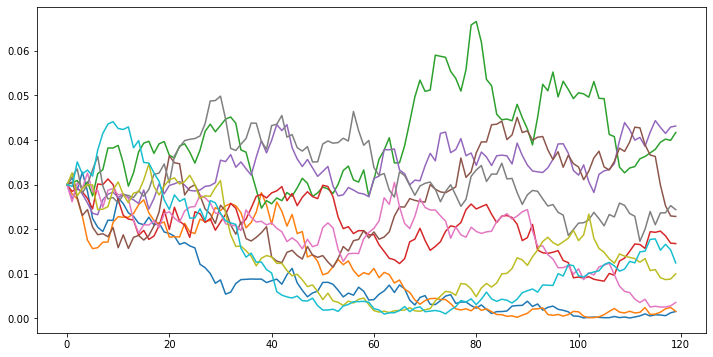

In [20]:
cir_model(scenarios=10).plot(legend=False, figsize=(12,6))

In [33]:
def plot_cir(n_years=10, scenarios = 1000, a = 0.05, b = 0.03, sigma = 0.05, steps_per_year=12, initial_r = 0.01):
    cir = cir_model(n_years, scenarios, a, b, sigma, steps_per_year, initial_r)
    ax = cir.plot(legend = False, figsize=(12,6), color="darkblue", alpha=0.2)
    ax.axhline(y=initial_r, ls=':', color="black")

In [38]:
show_cir = widgets.interactive(plot_cir, n_years=widgets.IntSlider(min=0, max=10,value=2,step=1), 
    scenarios= widgets.IntSlider(min=0, max=1000,value=10,step=10), 
    a=(.0, 1, .1), 
    b=(.0, .2, .01), 
    sigma=(.0, .3, .01), 
    steps_per_year=widgets.IntSlider(min=1, max=12, value=12, step = 1), 
    initial_r=(.0, .2, .01))

In [39]:
display(show_cir)

interactive(children=(IntSlider(value=2, description='n_years', max=10), IntSlider(value=10, description='scen…